In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import sklearn


In [2]:
dataset = pd.read_csv('Airplane_Crashes_Since_1908.csv', engine='python')

In [3]:
dataset.head()

Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN     1.0         1.0     0.0   
3          NaN   NaN    20.0        14.0     0.0   
4          NaN   NaN    30.0        30.0     0.0   

                                             Summary  
0  During a demonstration flight, a U.S. Army fly...  
1  First U.S. dirigible Akron exploded just offsh...  
2  The first fatal airplane accident in Canada oc...  
3  The airship flew into a thunderstorm and encou...  
4  Hydrogen gas which was being vented was sucked...

In [4]:
dataset.describe()

C:\Users\Таразали\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


Aboard   Fatalities       Ground
count  5246.000000  5256.000000  5246.000000
mean     27.554518    20.068303     1.608845
std      43.076711    33.199952    53.987827
min       0.000000     0.000000     0.000000
25%            NaN          NaN          NaN
50%            NaN          NaN          NaN
75%            NaN          NaN          NaN
max     644.000000   583.000000  2750.000000

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


In [6]:
dataset.shape


(5268, 13)

In [7]:
dataset.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [8]:
def missing_values(df):
    total_miss = df.isnull().sum()
    perc_miss = 100 * total_miss/len(df)
    table_miss = pd.concat([total_miss, perc_miss], axis=1)
    ren_table = table_miss.rename(columns={0:'Total Miss Values', 1:'% of miss Values'})
    ren_table = ren_table[ren_table.iloc[:,1]!=0].sort_values('% of miss Values', ascending = False).round(2)
    
    print('You data contains {}'.format(df.shape[1]) + ' columns and has {}'.format(ren_table.shape[0]) + ' colums with missing values' )
    
    return ren_table

In [9]:
missing_values(dataset)

You data contains 13 columns and has 12 colums with missing values


Total Miss Values  % of miss Values
Flight #                   4199             79.71
Time                       2219             42.12
Route                      1706             32.38
cn/In                      1228             23.31
Summary                     390              7.40
Registration                335              6.36
Type                         27              0.51
Aboard                       22              0.42
Ground                       22              0.42
Location                     20              0.38
Operator                     18              0.34
Fatalities                   12              0.23

In [10]:
dataset['Date'] =  pd.to_datetime(dataset['Date'], format='%m/%d/%Y')

In [11]:
dataset['year'], dataset['month'],dataset['day'] = dataset.Date.dt.year, dataset.Date.dt.month, dataset.Date.dt.day

In [12]:
dataset.head(1)

Date   Time             Location              Operator Flight #  \
0 1908-09-17  17:18  Fort Myer, Virginia  Military - U.S. Army      NaN   

           Route              Type Registration cn/In  Aboard  Fatalities  \
0  Demonstration  Wright Flyer III          NaN     1     2.0         1.0   

   Ground                                            Summary  year  month  day  
0     0.0  During a demonstration flight, a U.S. Army fly...  1908      9   17

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 16 columns):
Date            5268 non-null datetime64[ns]
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
year            5268 non-null int64
month           5268 non-null int64
day             5268 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 658.6+ KB


In [14]:
dataset['Location'][0:5]

0                   Fort Myer, Virginia
1               AtlantiCity, New Jersey
2    Victoria, British Columbia, Canada
3                    Over the North Sea
4            Near Johannisthal, Germany
Name: Location, dtype: object

In [15]:
dataset['Country'] = dataset['Location'].str.split(',').str[1]

In [16]:
dataset.head()

Date   Time                            Location  \
0 1908-09-17  17:18                 Fort Myer, Virginia   
1 1912-07-12  06:30             AtlantiCity, New Jersey   
2 1913-08-06    NaN  Victoria, British Columbia, Canada   
3 1913-09-09  18:30                  Over the North Sea   
4 1913-10-17  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN     1.0         1.0     0.0   
3          NaN   NaN    20.0        14.0     0.0   
4          NaN   NaN    30.0        30.0     0.0   

                                             Summary  year  month  day  \
0  During a demonstration flight, a U.S. Army fly...  1908      9   17   
1  First U.S. dirigible Akron exploded just offsh...  1912      7   12   
2  The first fatal airplane accident in Canada oc...  1913      8    6   
3  The airship flew into a thunderstorm and encou...  1913      9    9   
4  Hydrogen gas which was being vented was sucked...  1913     10   17   

             Country  
0           Virginia  
1         New Jersey  
2   British Columbia  
3                NaN  
4            Germany

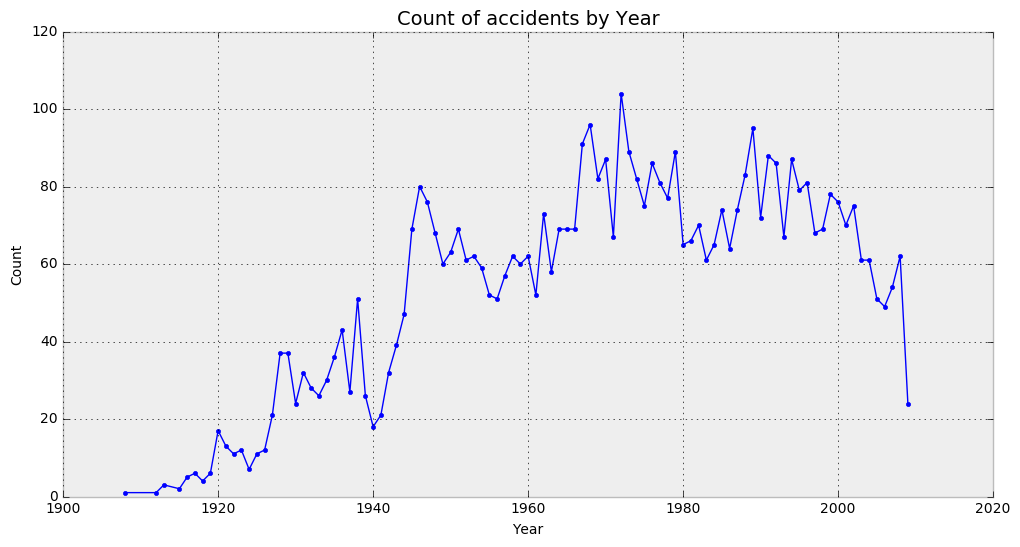

In [17]:
temp = dataset.groupby(dataset.year)[['Date']].count()
temp = temp.rename(columns={'Date':'Count'})

plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.plot(temp.index, 'Count', data=temp, color='blue', marker='.', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

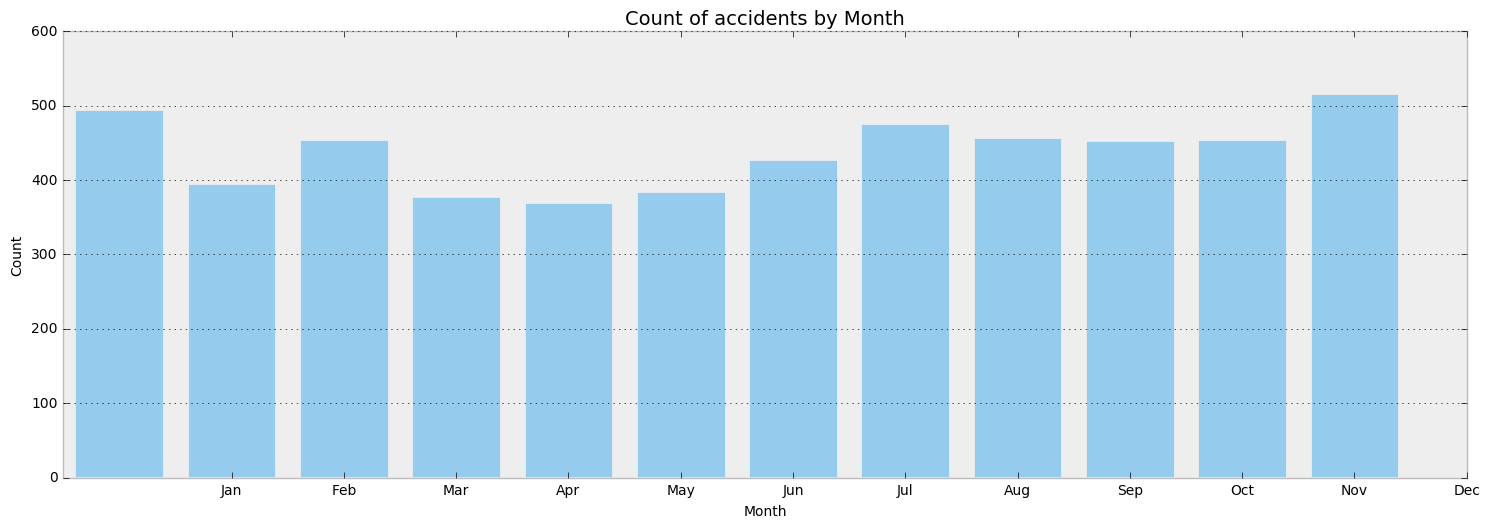

In [18]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 1)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax = pl.subplot(gs[0, :]) # row 0, col 0
sns.barplot(dataset.groupby(dataset.month)[['Date']].count().index, 'Date', data=dataset.groupby(dataset.month)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(dataset.groupby(dataset.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14)


plt.tight_layout()
plt.show()

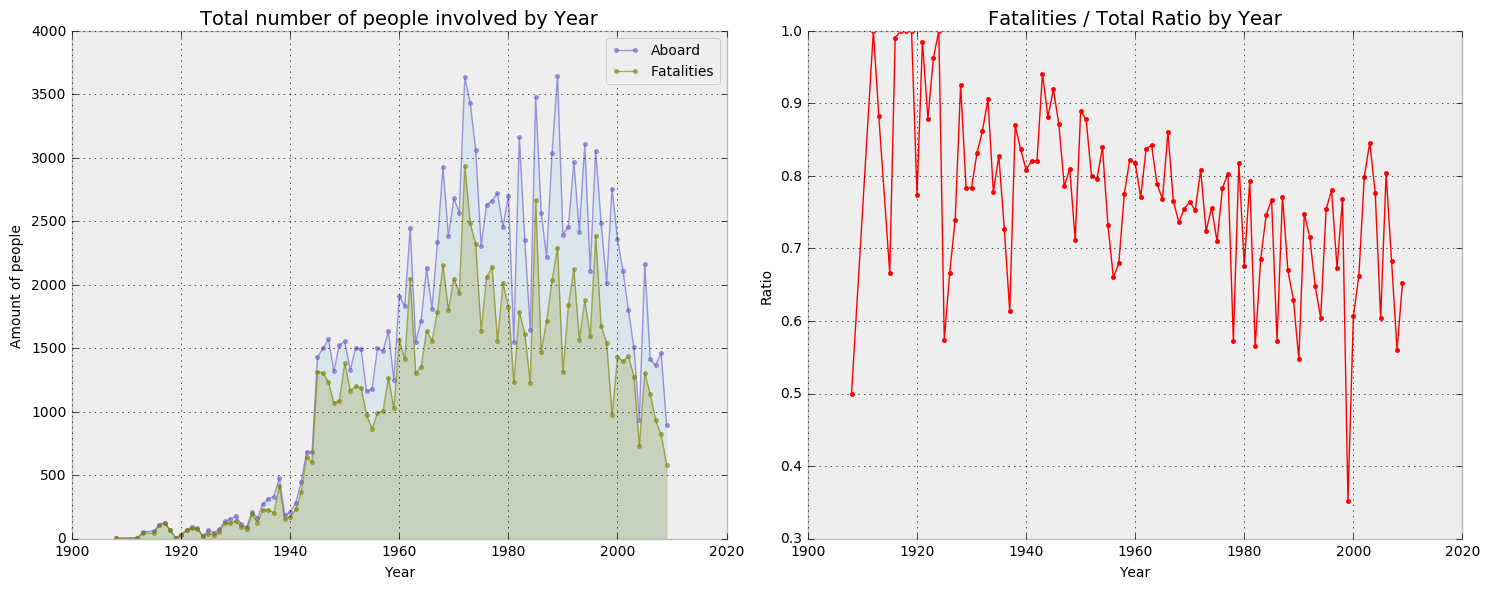

In [19]:
Fatalities = dataset.groupby(dataset.year).sum()

Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker = ".", color = 'red', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()


In [20]:
dataset['Survived'] = dataset['Aboard'] - dataset['Fatalities']
dataset.head(1)

Date   Time             Location              Operator Flight #  \
0 1908-09-17  17:18  Fort Myer, Virginia  Military - U.S. Army      NaN   

           Route              Type Registration cn/In  Aboard  Fatalities  \
0  Demonstration  Wright Flyer III          NaN     1     2.0         1.0   

   Ground                                            Summary  year  month  \
0     0.0  During a demonstration flight, a U.S. Army fly...  1908      9   

   day    Country  Survived  
0   17   Virginia       1.0

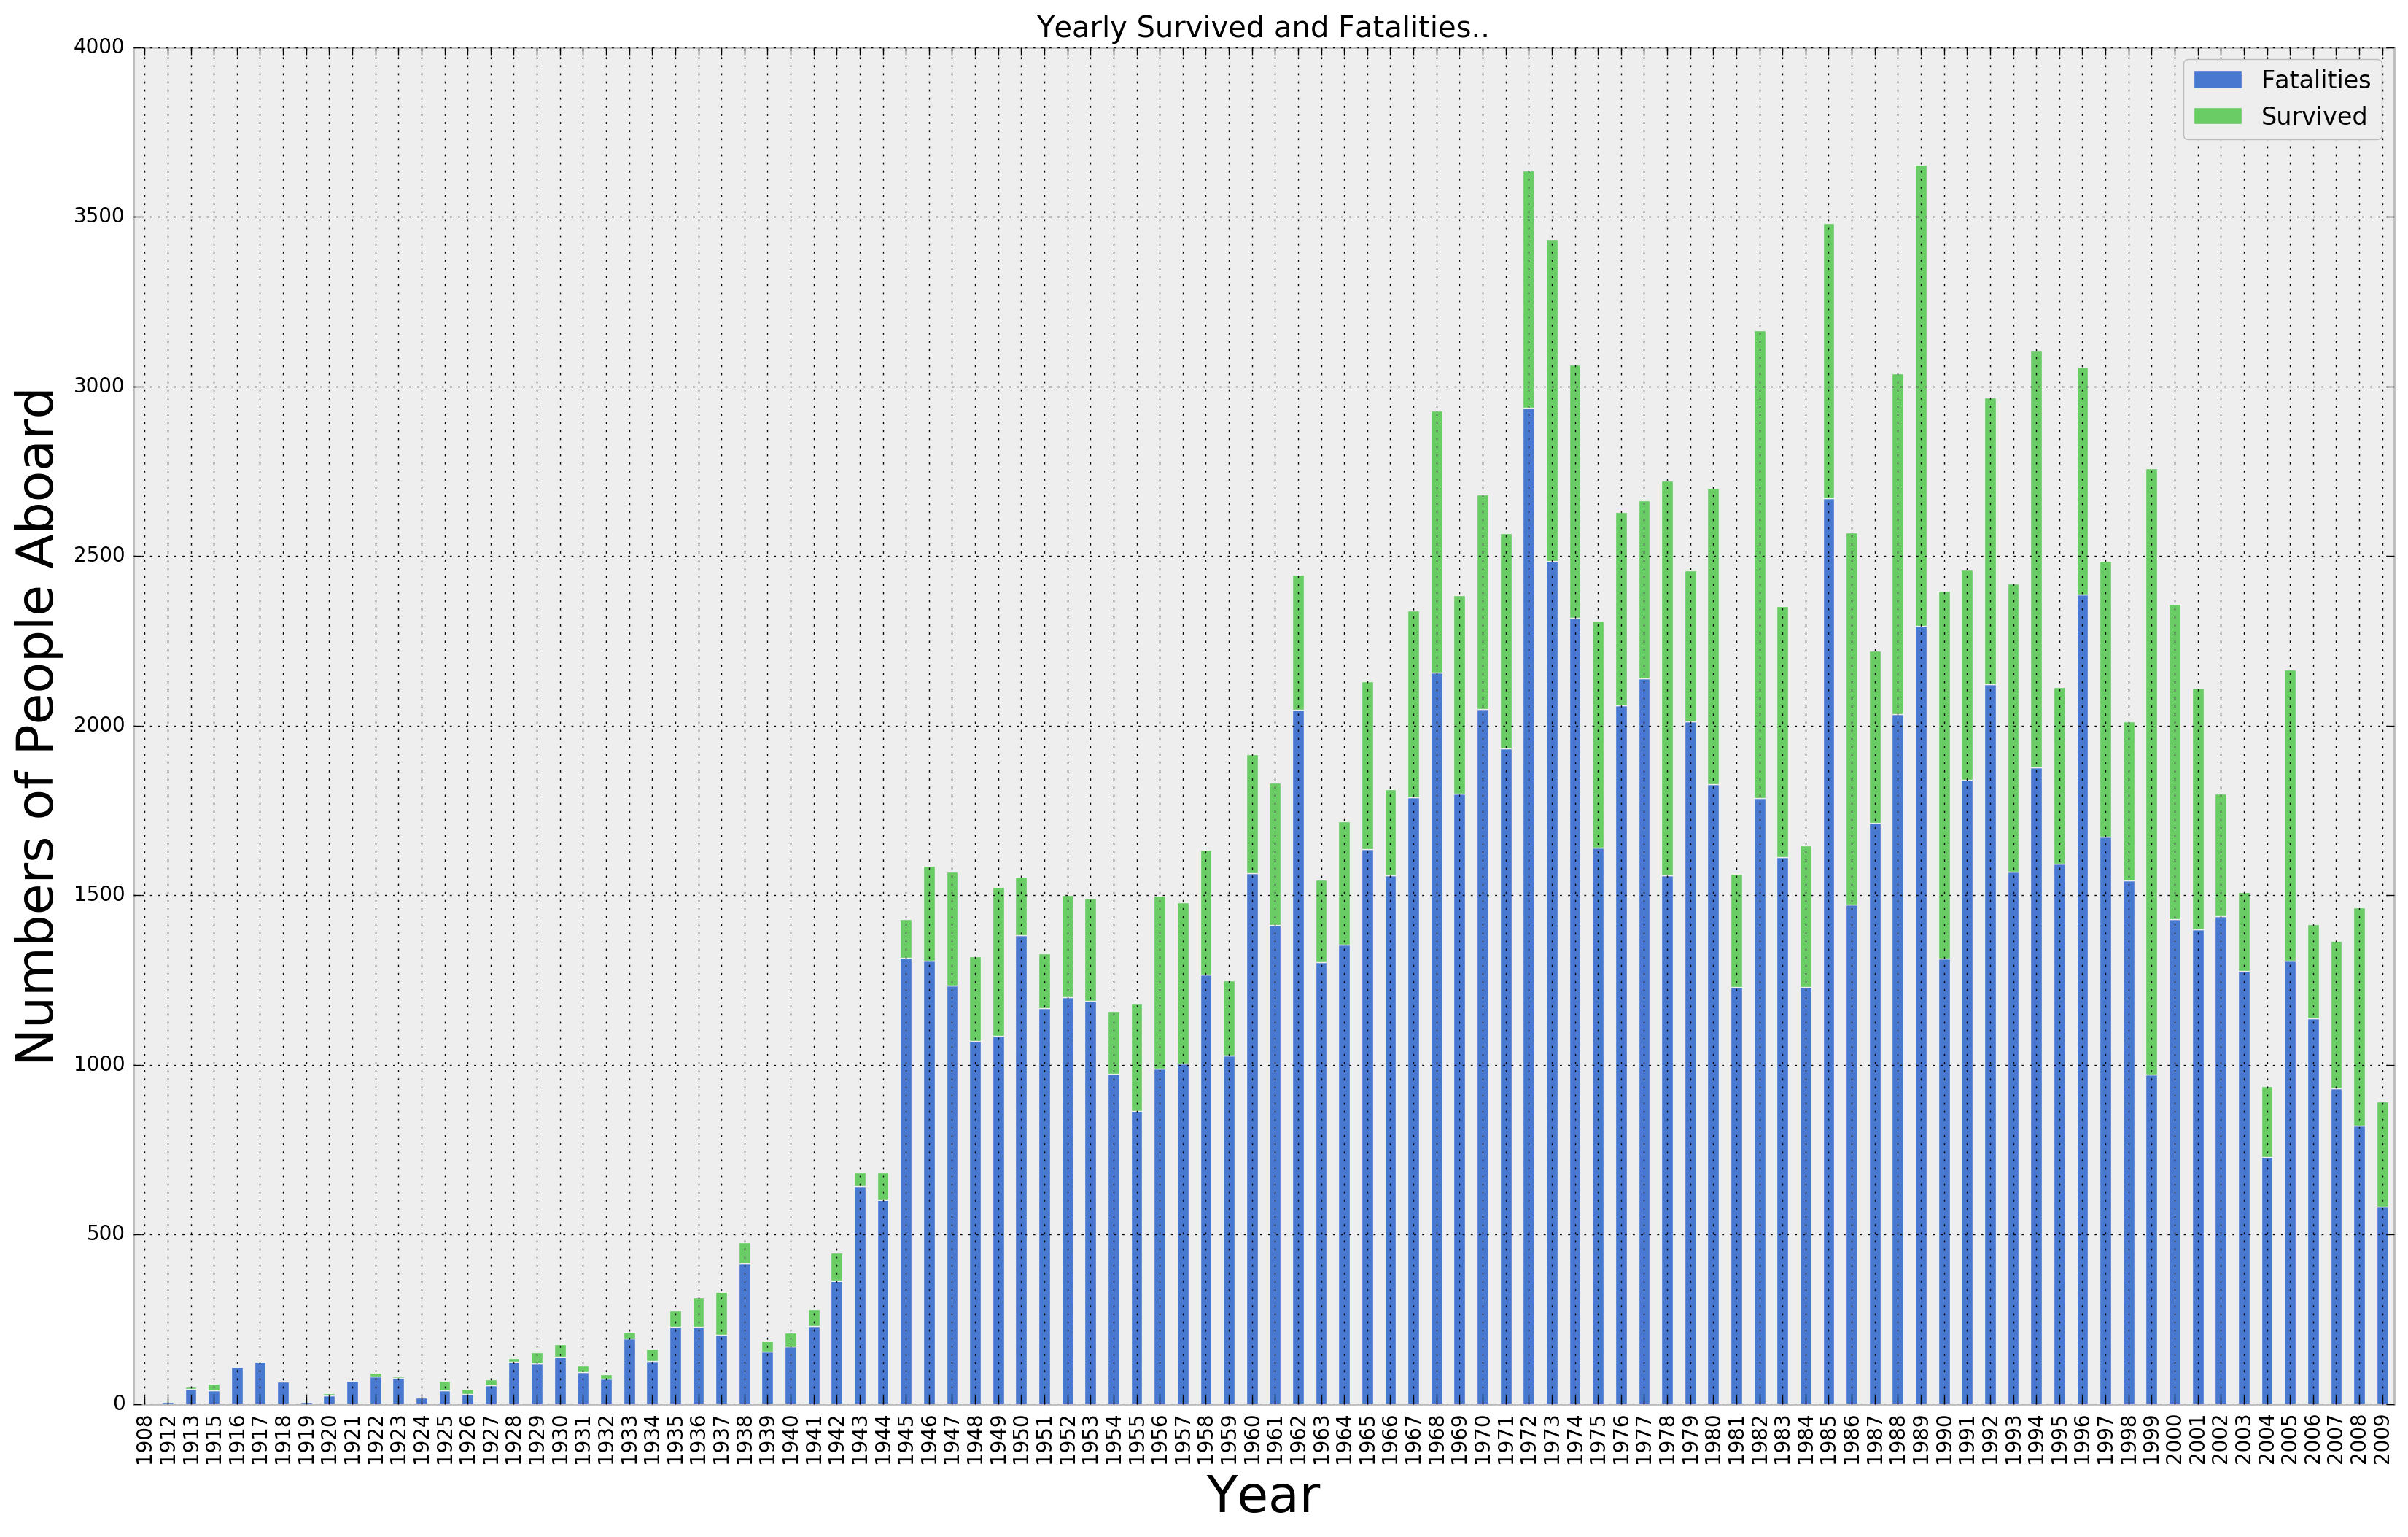

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

yearlyStats = dataset.loc[:, ["year","Fatalities", "Survived"]].groupby(['year']).sum()
plot2 = yearlyStats.plot.bar(stacked=True, title='Yearly Survived and Fatalities..', figsize=(20,12))
plot2.set_xlabel("Year", fontsize=25)
plot2.set_ylabel("Numbers of People Aboard", fontsize=25)



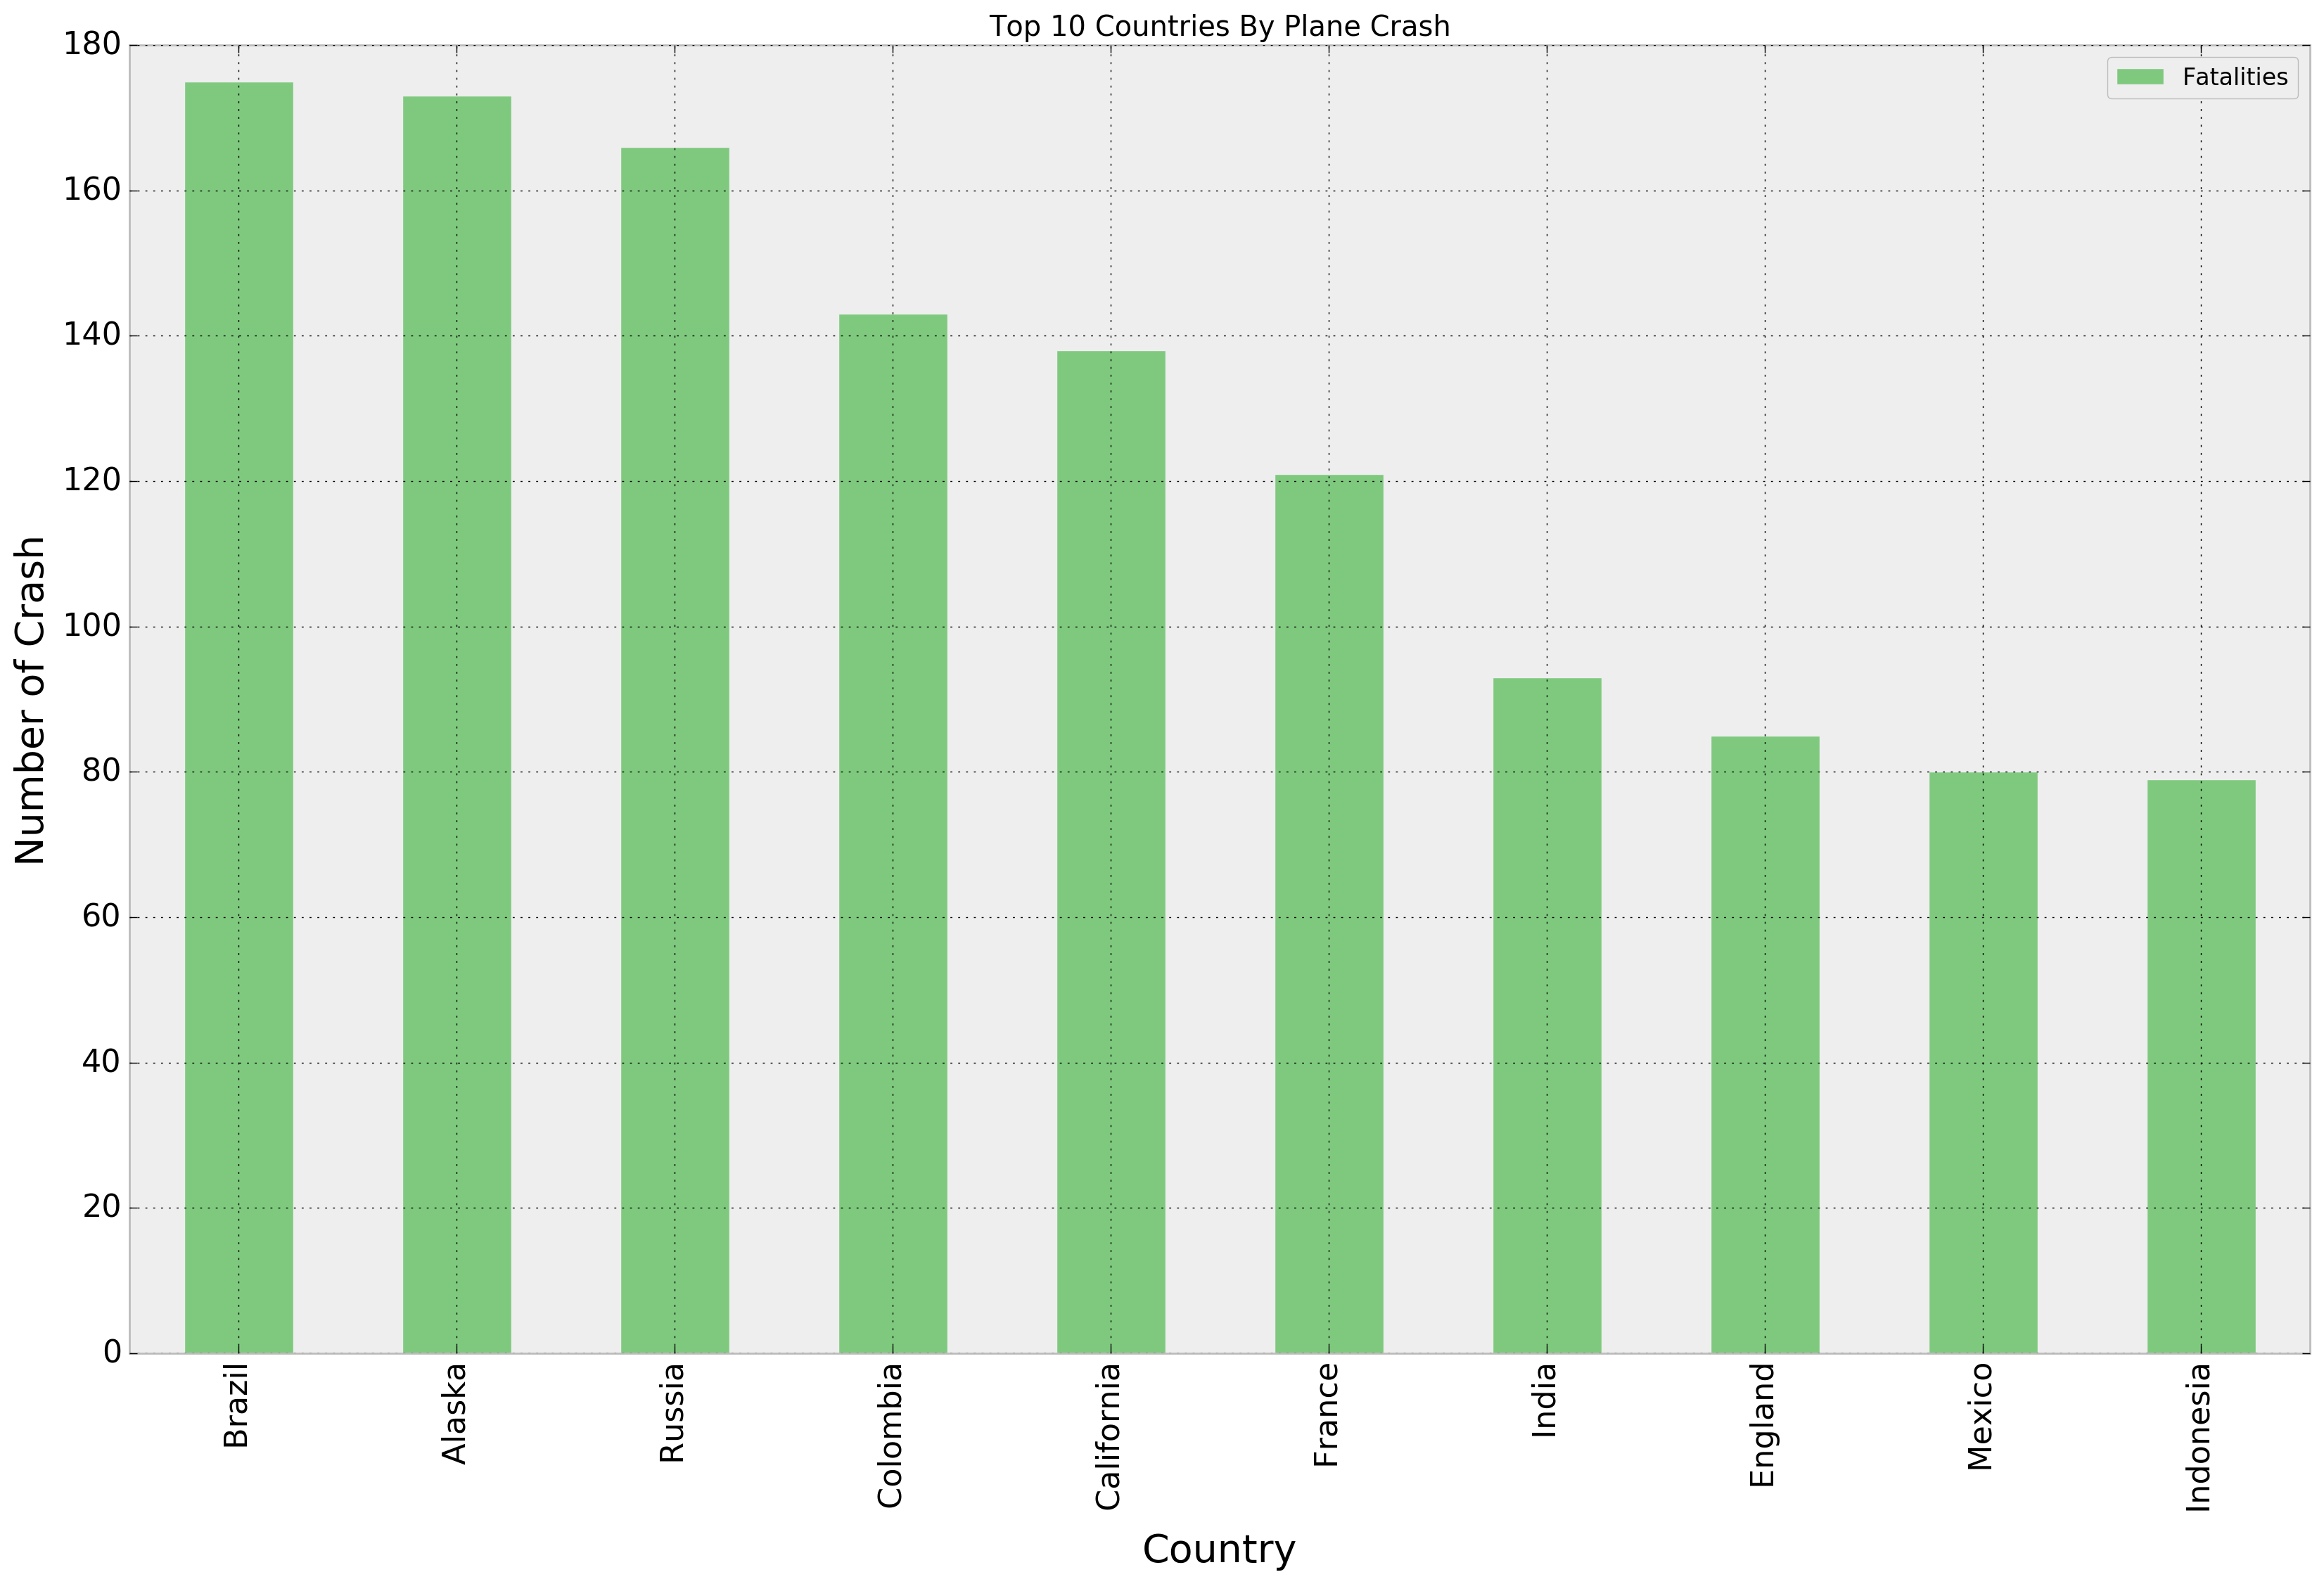

In [22]:
location_crash = dataset.loc[:, ["Country","Fatalities"]].groupby(['Country']).count()
location_crash = location_crash.sort_values(by="Fatalities", ascending=False).head(10)
plot3 = location_crash.plot.bar( fontsize=16, colormap='Accent', figsize=(20,12), title="Top 10 Countries By Plane Crash")
plot3.set_xlabel("Country", fontsize=20,)
plot3.set_ylabel("Number of Crash", fontsize=20,)

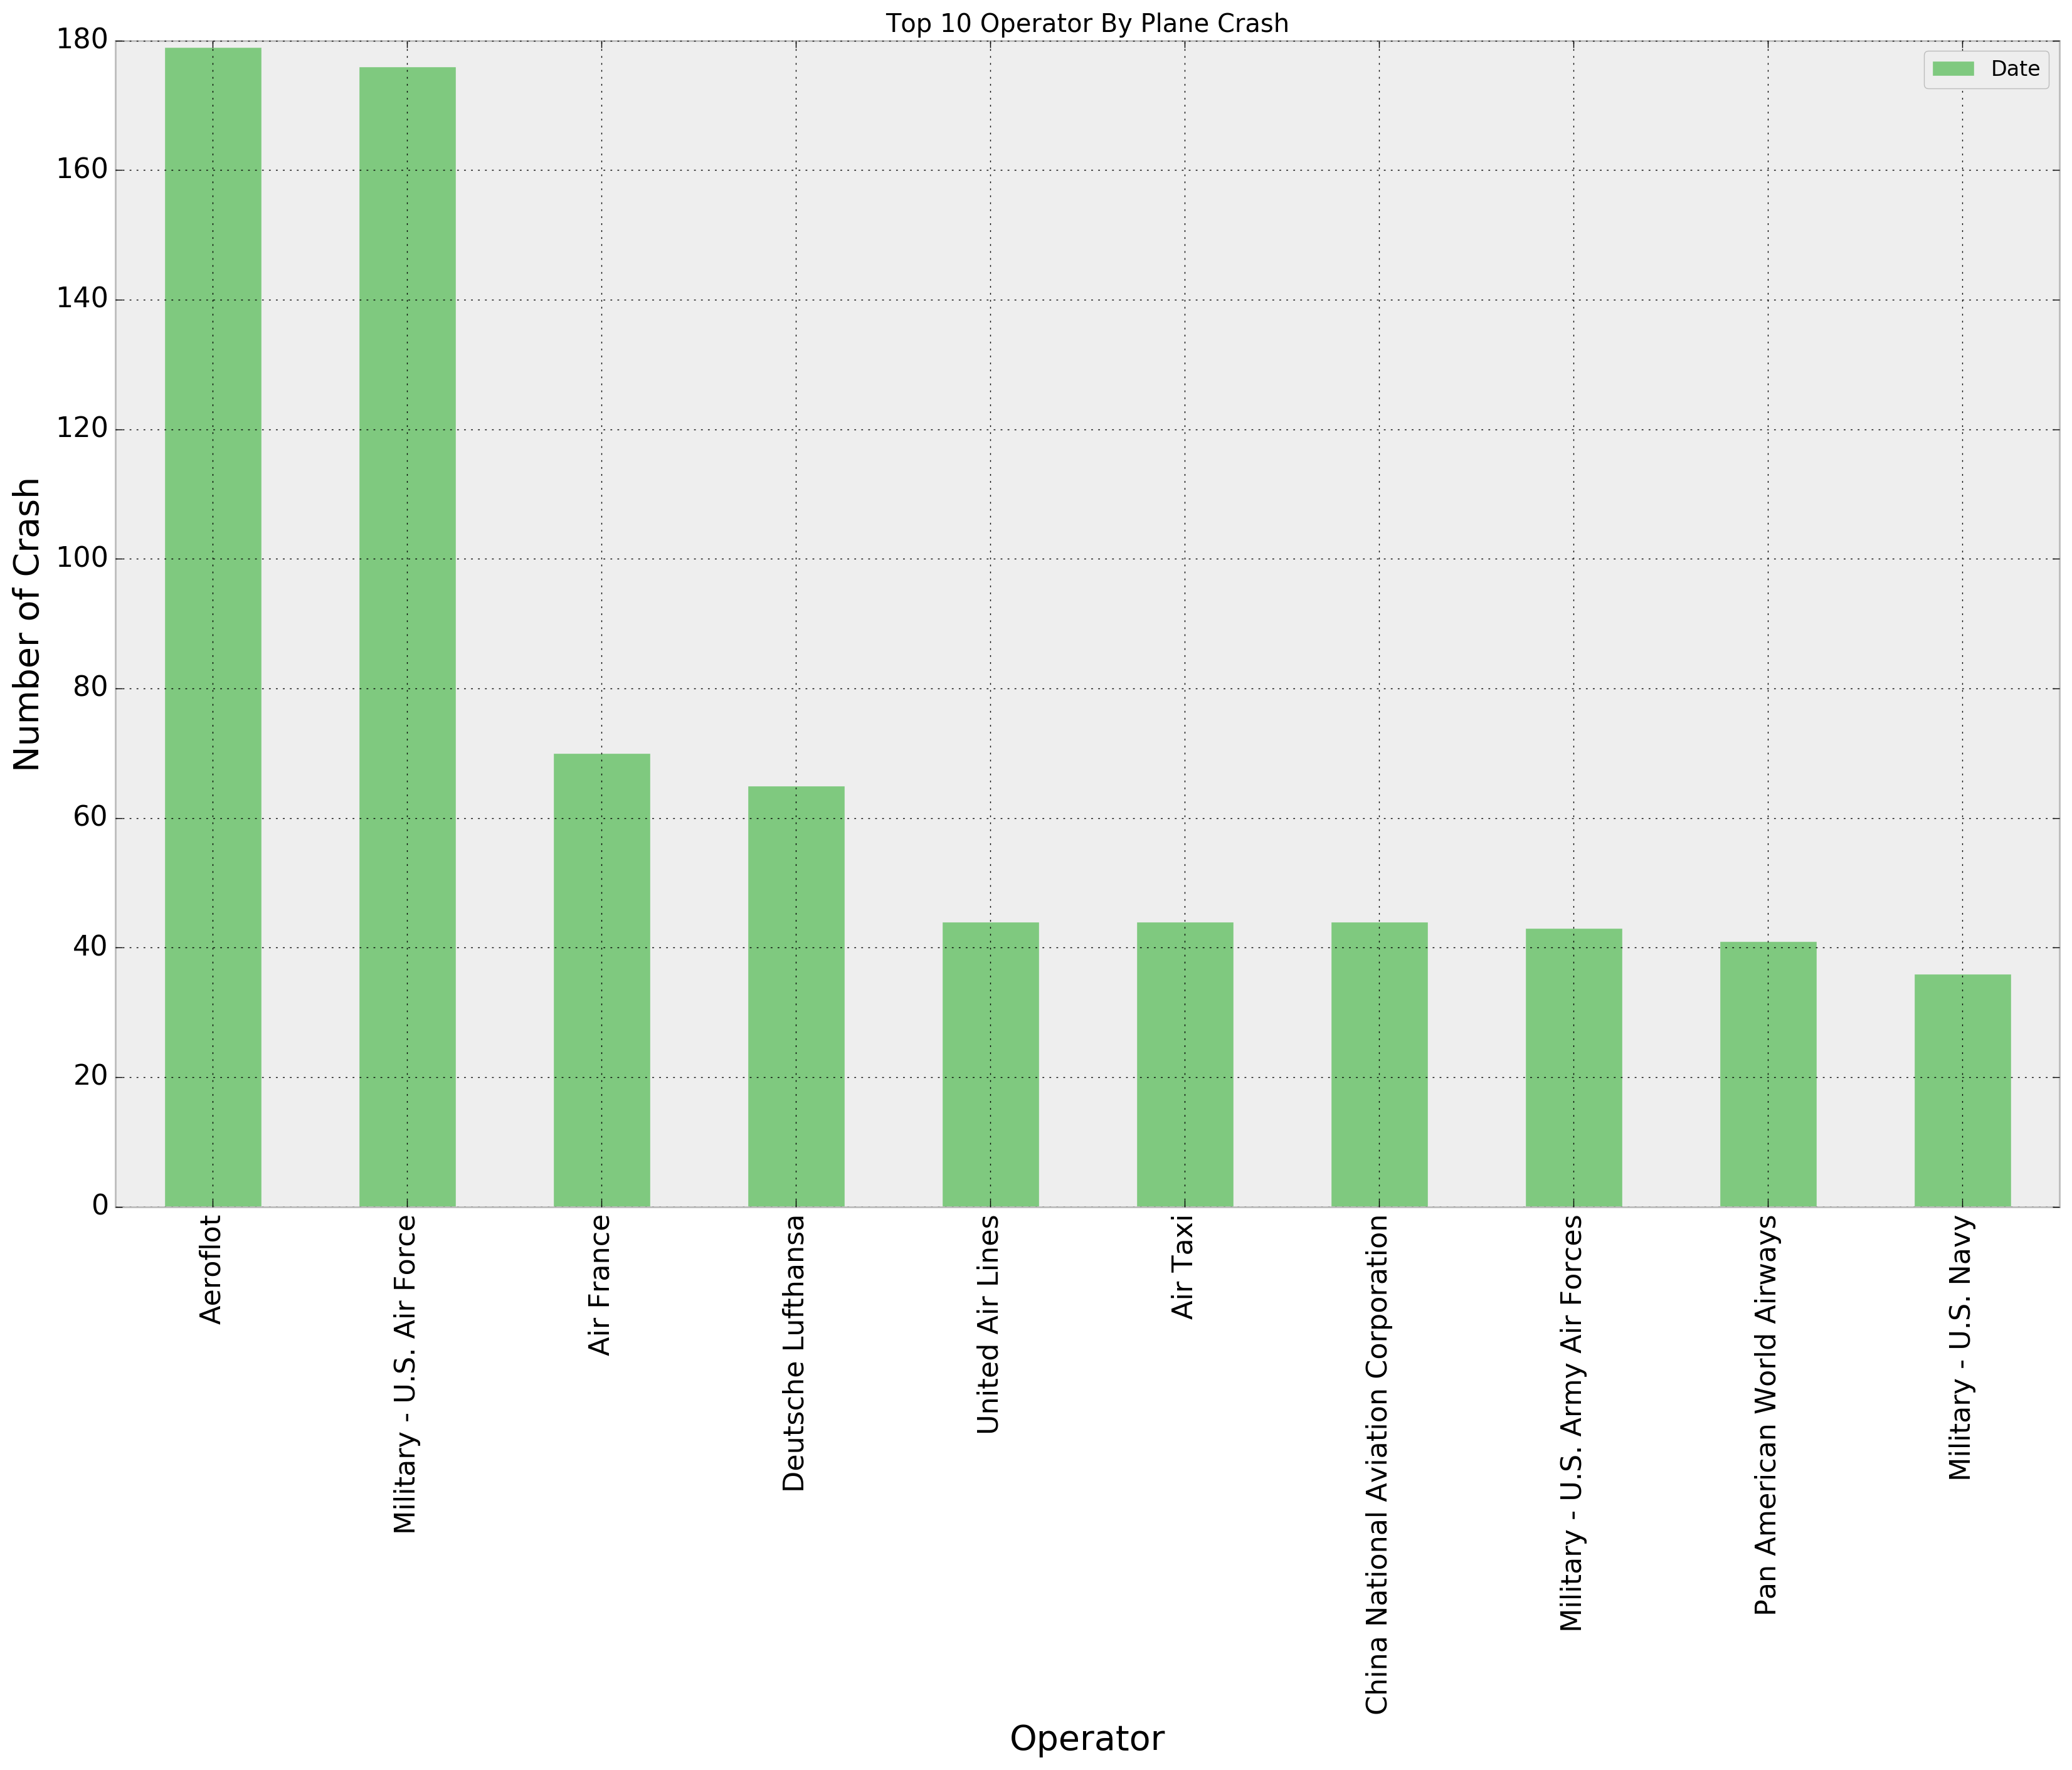

In [23]:
crashedByOperator = dataset.loc[:, ["Operator","Date"]].groupby(['Operator']).count()
crashedByOperator = crashedByOperator.sort_values(by="Date", ascending=False).head(10)
plot3 = crashedByOperator.plot.bar( fontsize=16, colormap='Accent', figsize=(20,12), title="Top 10 Operator By Plane Crash")
plot3.set_xlabel("Operator", fontsize=20,)
plot3.set_ylabel("Number of Crash", fontsize=20,)


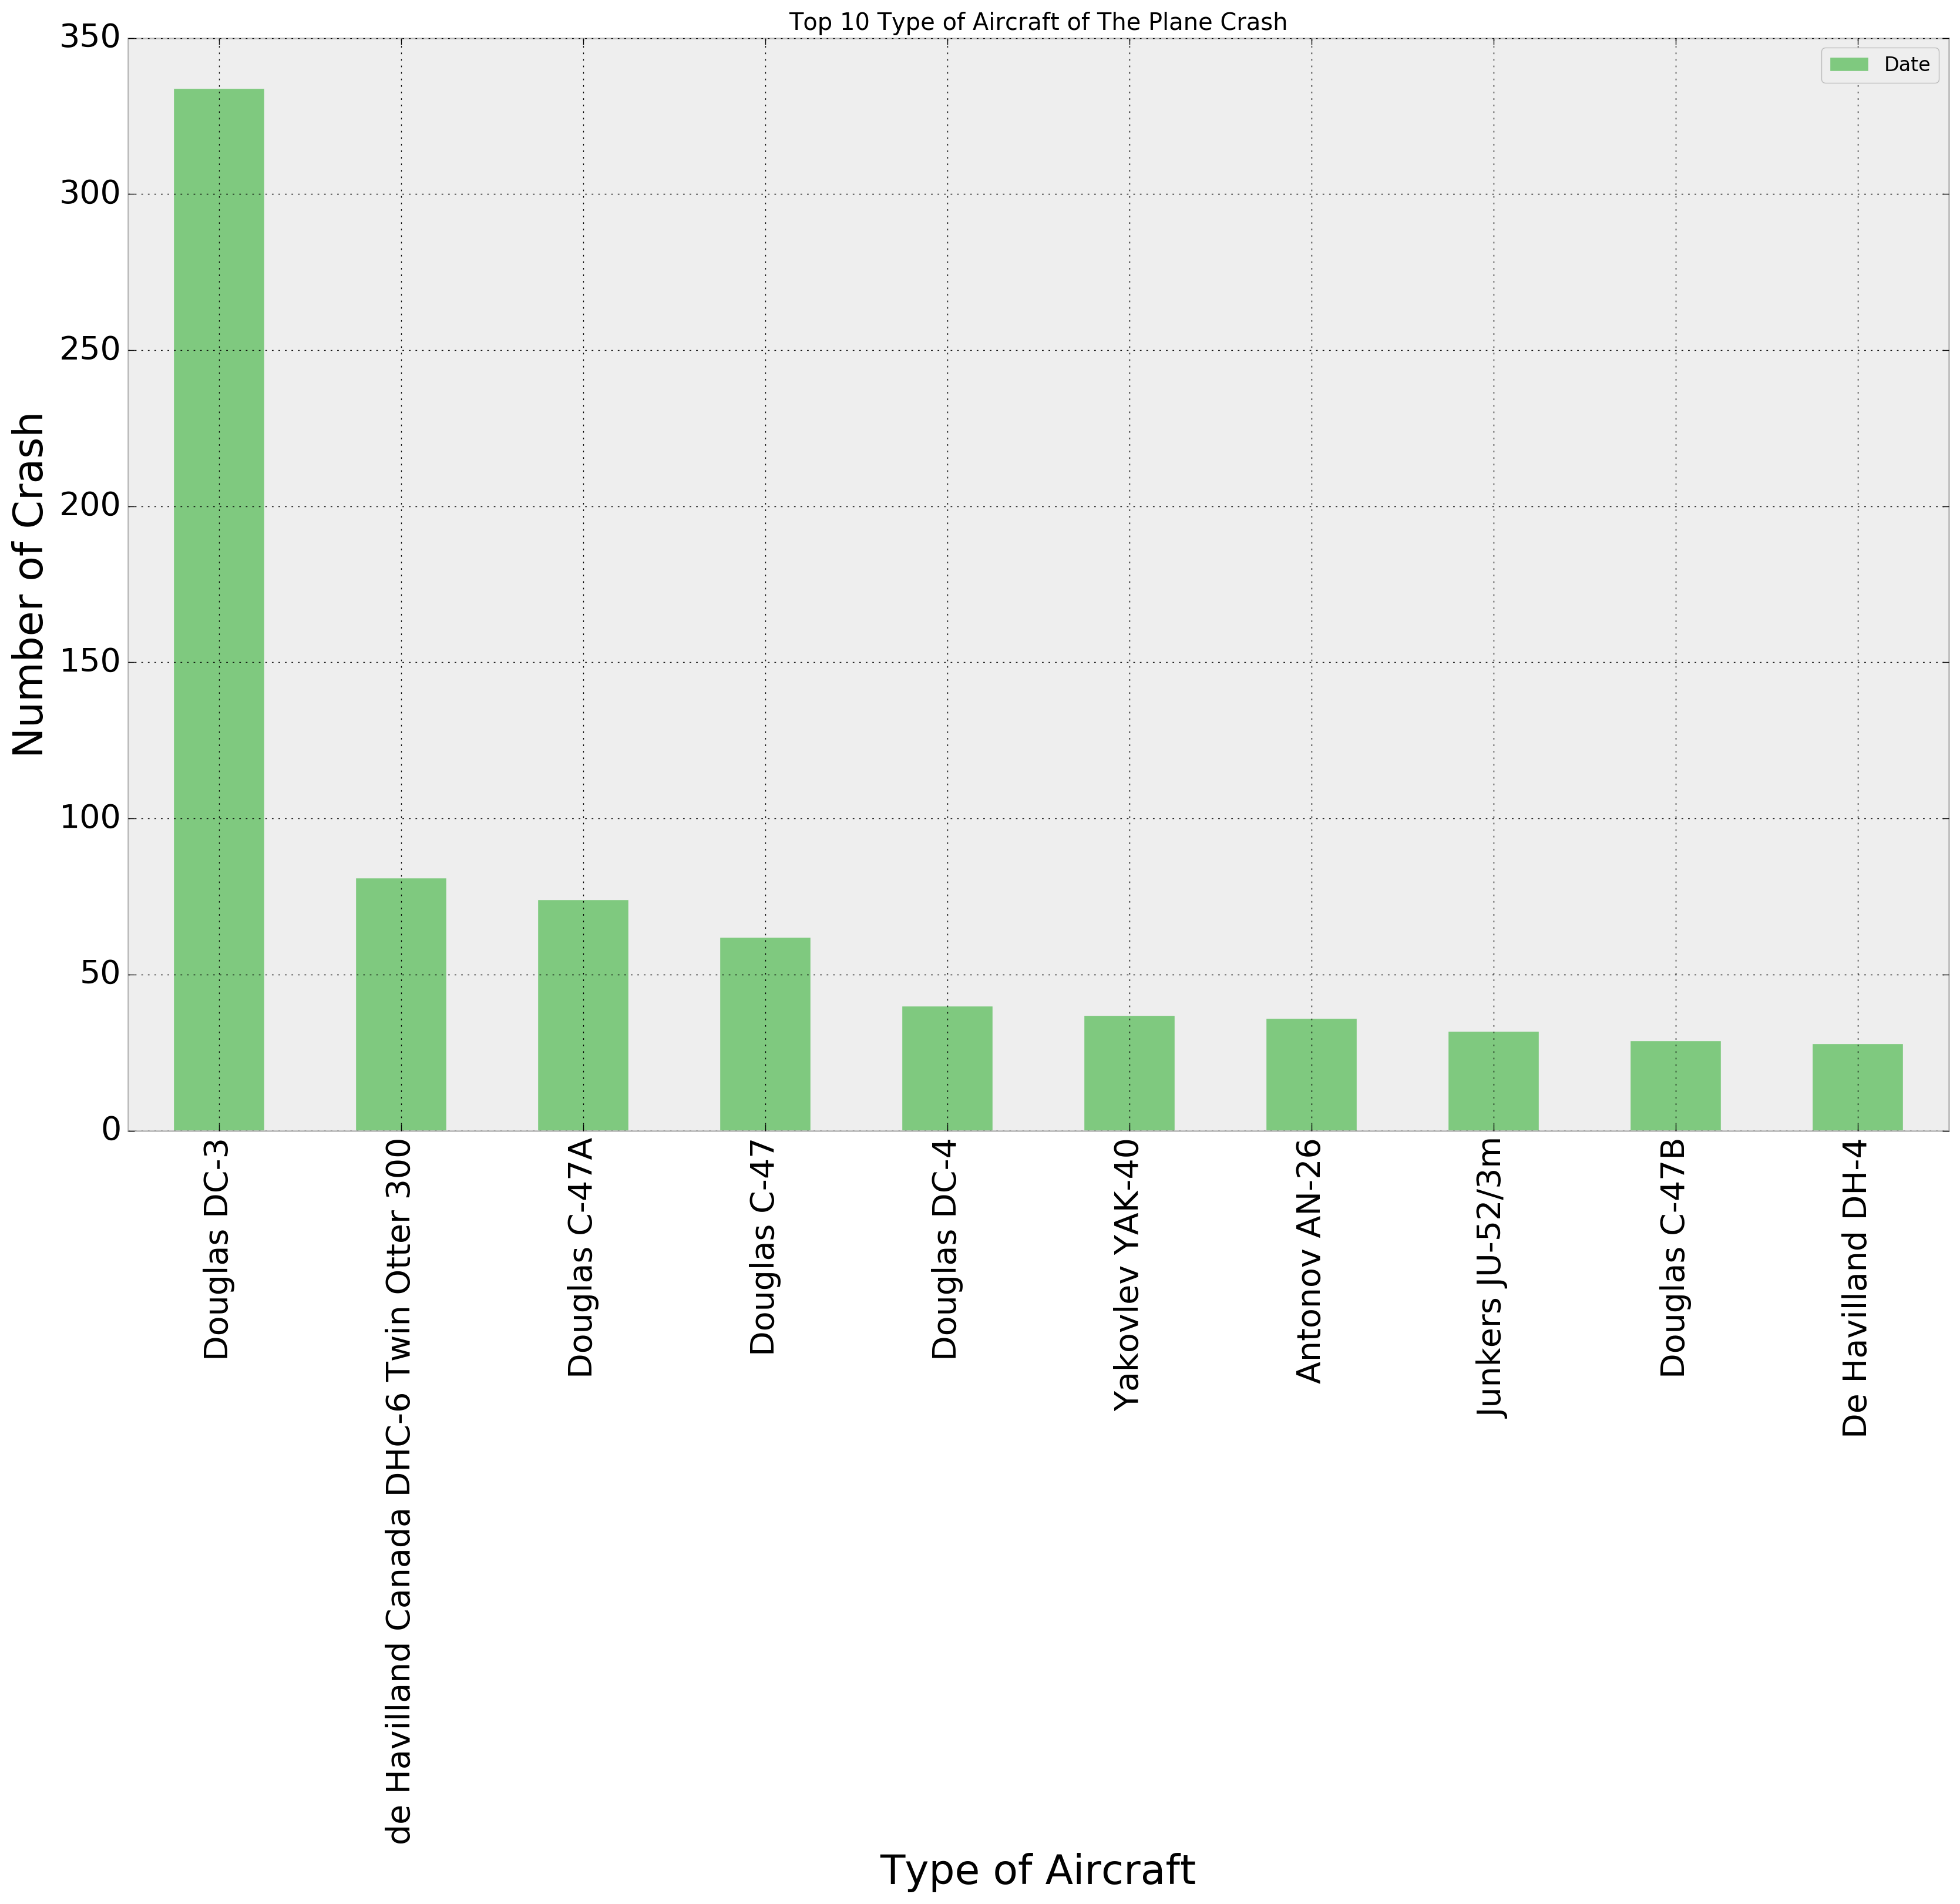

In [24]:
crashedByType = dataset.loc[:, ["Type","Date"]].groupby(['Type']).count()
crashedByType = crashedByType.sort_values(by="Date", ascending=False).head(10)
plot4 = crashedByType.plot.bar(figsize=(20,12), colormap='Accent', 
                               title="Top 10 Type of Aircraft of The Plane Crash", fontsize=20)
plot4.set_xlabel("Type of Aircraft", fontsize=25)
plot4.set_ylabel("Number of Crash", fontsize=25)

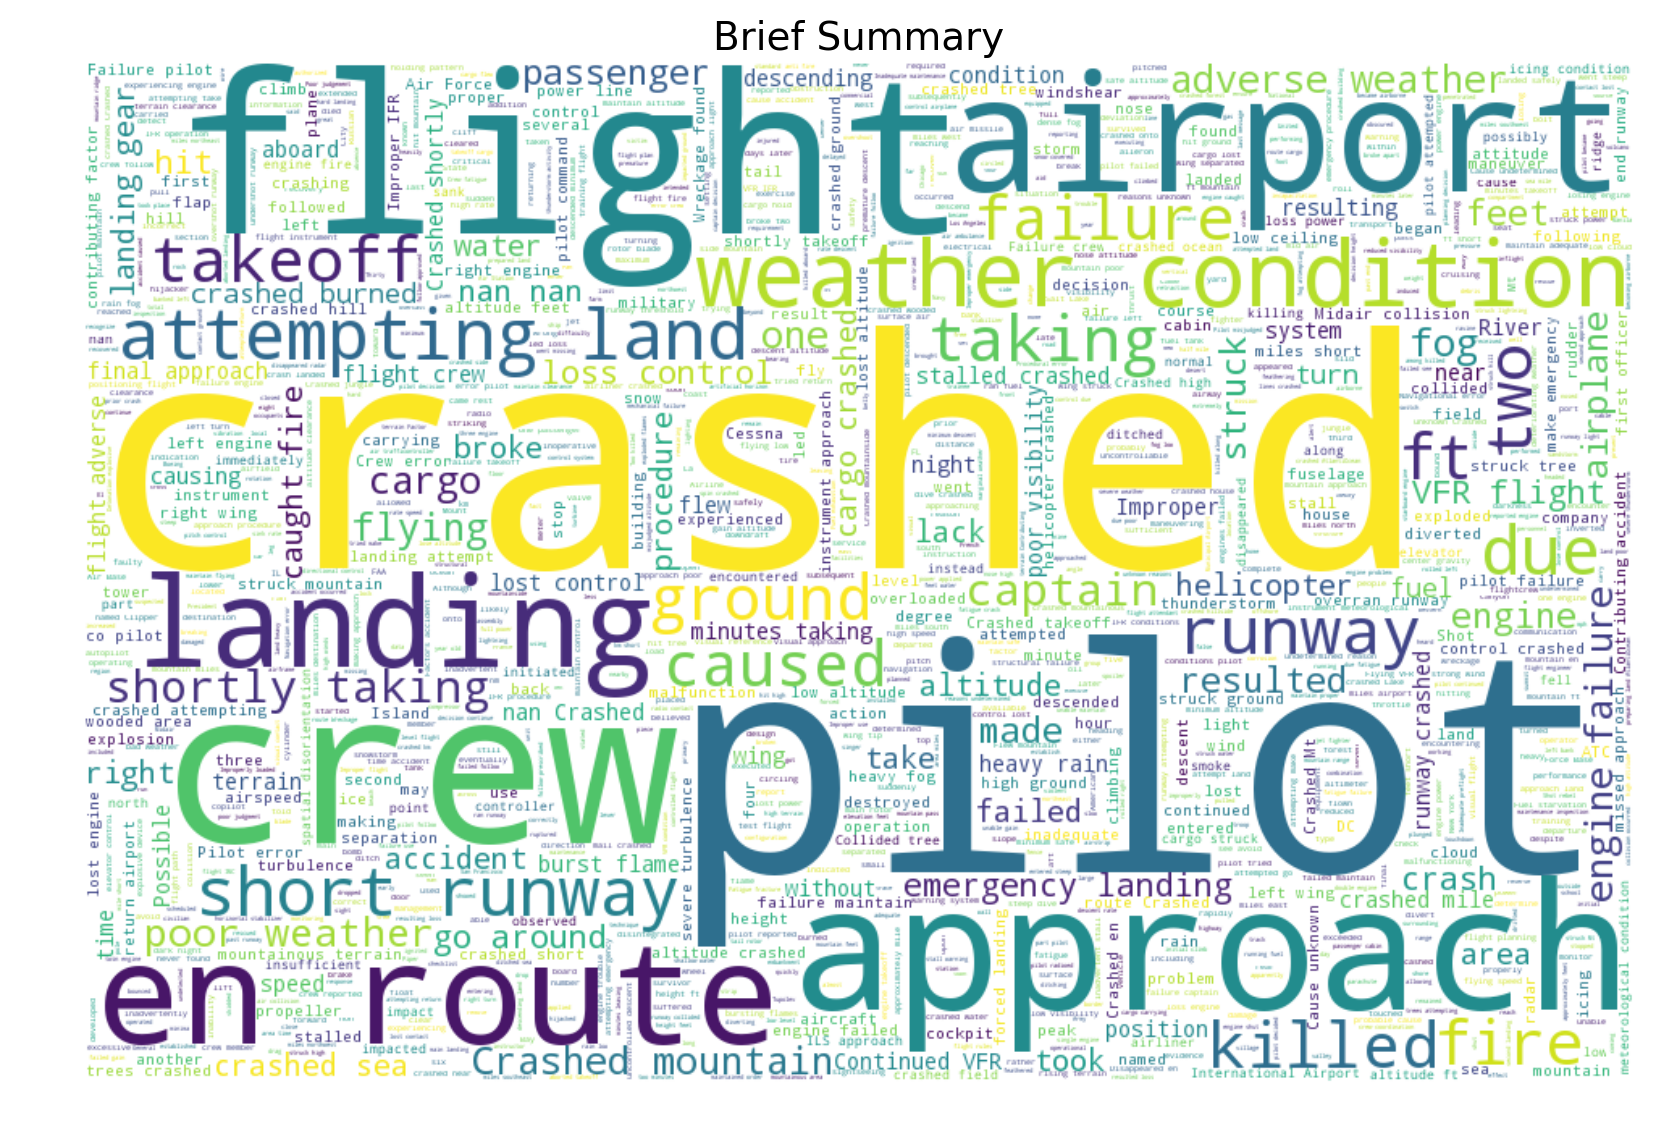

In [44]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
#from IPython.display import Image

text = str(dataset.Summary.tolist())
plane_mask = np.array(Image.open('./aircraft-1293790_960_720.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Brief Summary', loc='Center', fontsize=14)
plt.savefig('aircraft_wordcloud.png', dpi=50)
plt.show()

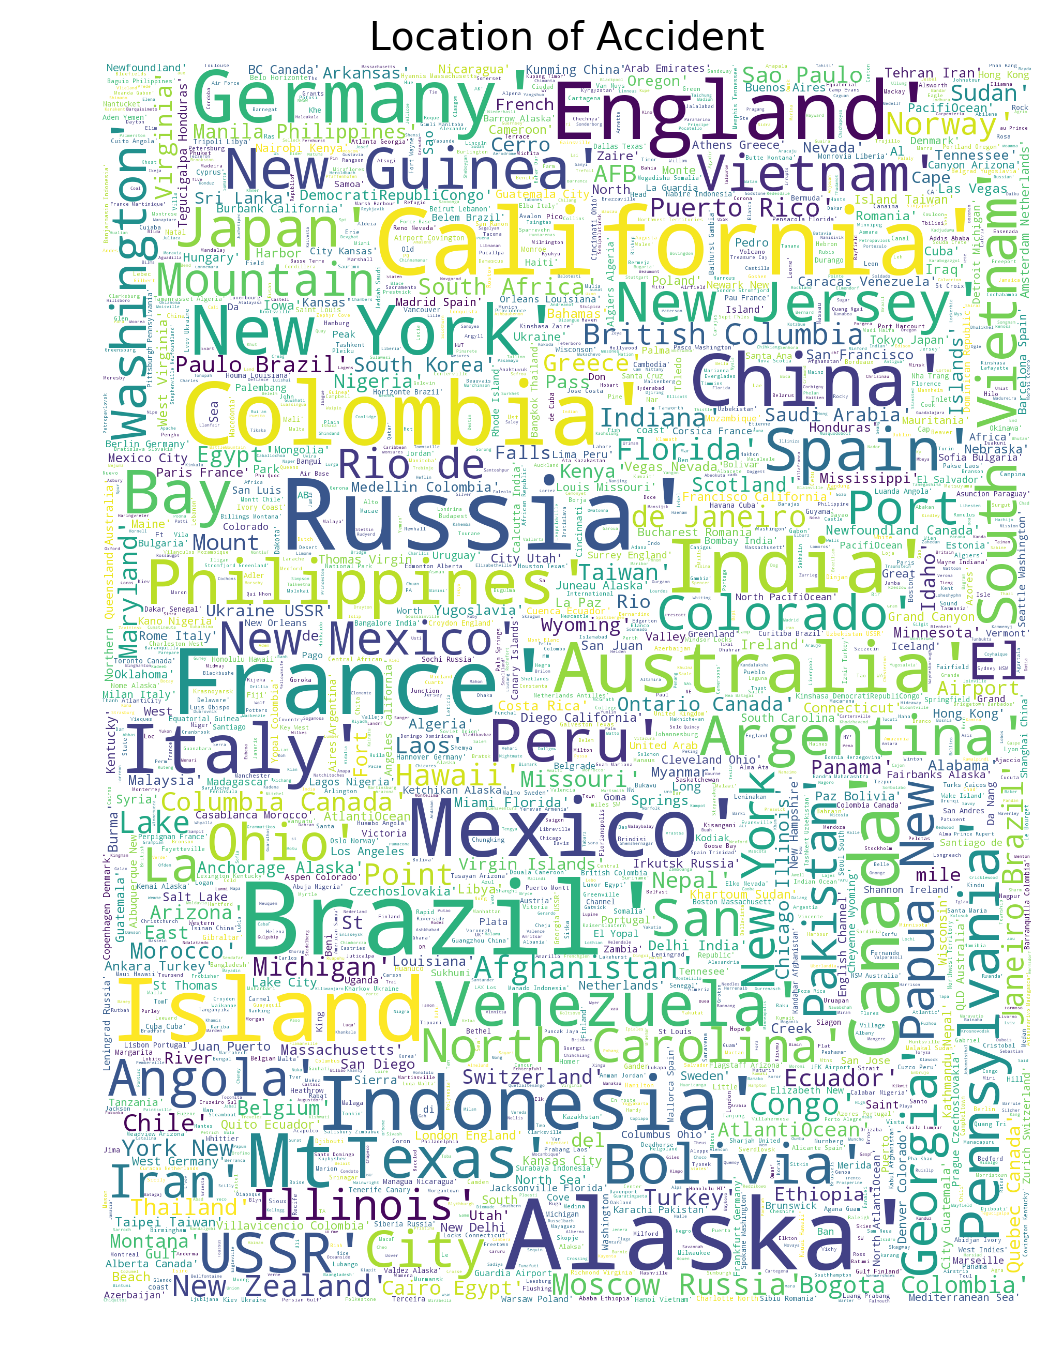

In [45]:
text = str(dataset.Location.tolist())
globe_mask = np.array(Image.open('./globe-silhouette-1526482563.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('nan')
stopwords.add('Near')

wc = WordCloud(background_color="white", max_words=2000, mask=globe_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Location of Accident', loc='Center', fontsize=14)
plt.show()